# Santiago Londoño Álvarez   1000084281

# Tarea 8.2

1. Entrenar el modelo anterior para un numero mayor de caracteristicas
2. Analizar que pasa con la regularaización.
3. Hacer una analisis de las metricas, construir curvas de aprendizaje para todo el conjunto de datos
4. Con base en el libro [Hand on Machine learning](https://github.com/ageron/handson-ml/blob/master/04_training_linear_models.ipynb), constrnuir las fronteras de desición para este multiclasificador.

# Solución

# 1. Entrenar el modelo anterior para un numero mayor de caracteristicas

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
iris = datasets.load_iris()

Y = iris["target"] # Vector de las clases, el 0 es una clase, el 1 otra y el 2 otra. Cada valor es la clase de una instancia

features = iris["feature_names"]
data = pd.DataFrame(iris["data"], columns = features)
data["target"] = iris["target"]
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
X_entrenamiento, X_test, Y_entrenamiento, Y_test = train_test_split(data[features], data["target"], test_size = 0.3, random_state = 48, stratify = Y)

In [11]:
logistic = LogisticRegression(max_iter = 1000)
logistic.fit(X_entrenamiento, Y_entrenamiento)

exactitud_entrenamiento = logistic.score(X_entrenamiento, Y_entrenamiento)
exactitud_test = logistic.score(X_test, Y_test)

print(f"Exactitud en entrenamiento: {exactitud_entrenamiento}")
print(f"Exactitud en test: {exactitud_test}")

Exactitud en entrenamiento: 0.9619047619047619
Exactitud en test: 0.9777777777777777


In [25]:
prediccion = logistic.predict(X_test)

print(f"Target real: {Y_test.to_list()}\n")
print(f"T. predicho: {list(prediccion)}")

Target real: [1, 2, 0, 0, 2, 0, 2, 0, 1, 2, 2, 2, 1, 0, 0, 1, 1, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 0, 2, 0, 1, 2, 0, 2, 2, 1, 0, 2]

T. predicho: [1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 2, 2, 1, 0, 0, 1, 1, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 0, 2, 0, 1, 2, 0, 2, 2, 1, 0, 2]


# 2. Analizar que pasa con la regularaización.

La función de costo que se quiere minimizar usando la regularización es

$$J(\Theta) = \frac{1}{2m} (\Theta^{T} X - Y)^2 + \frac{\sigma^2}{\tau^2} \left| \Theta \right|^2$$

`LogisticRegression` permite usar esta función de costo cuando se ajusta el parámetro `penalty = 'l2'`. Scikitlearn usa como parámetro de regularización a $C = \frac{\tau^2}{\sigma^2}$, que es el inverso multiplicativo del coeficiente que acompaña a $\left| \Theta \right|^2$. A menor sea $C$ mayor es el efecto de la regularización.

/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


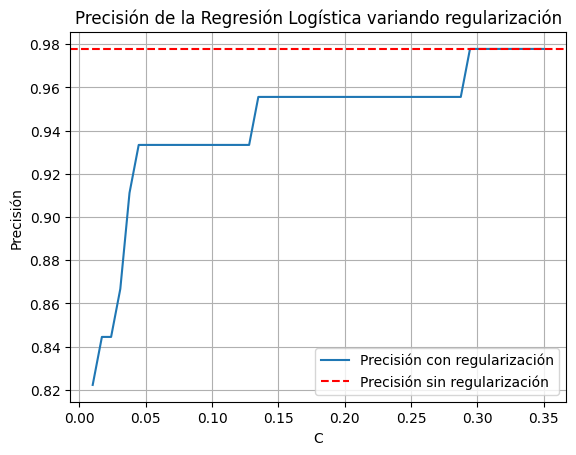

In [33]:
C = np.linspace(0.01, 0.35, 50)
scores = []

for parametro_regularizacion in C:

    regu_logist = LogisticRegression(penalty = 'l2', C = parametro_regularizacion, solver = 'lbfgs')
    regu_logist.fit(X_entrenamiento, Y_entrenamiento)
    prediccion_logistica_con_regularizacion = regu_logist.predict(X_test)

    exactitud = regu_logist.score(X_test, Y_test)
    scores.append(exactitud)


plt.plot(C, scores, label = "Precisión con regularización")
plt.axhline(y = exactitud_test, color = 'red', linestyle = '--', label = "Precisión sin regularización")
plt.xlabel("C")
plt.ylabel("Precisión")
plt.title("Precisión de la Regresión Logística variando regularización")
plt.legend()
plt.grid(True)
plt.show()

Como se puede observar, la regularización simplifica el modelo cuando este no debe ser simplificado, dañando negativamente la precisión al aumentar la regularización.

# 3. Hacer una análisis de las métricas, construir curvas de aprendizaje para todo el conjunto de datos

La matriz de confusion muestra para el modelo muestra el gran desempeño de este, pues solo obtuvo un error en el set de testeo. y los resultados son consistentes con la matriz de confusion del set de entrenamiento.

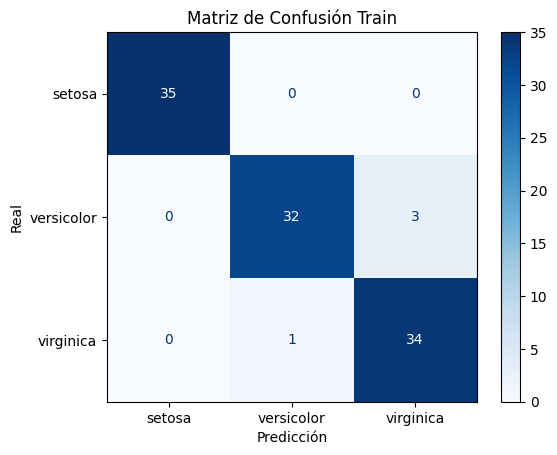

In [53]:
ConfusionMatrixDisplay.from_estimator(logistic, X_entrenamiento, Y_entrenamiento, cmap = 'Blues', display_labels = iris["target_names"])
plt.title("Matriz de Confusión Train")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

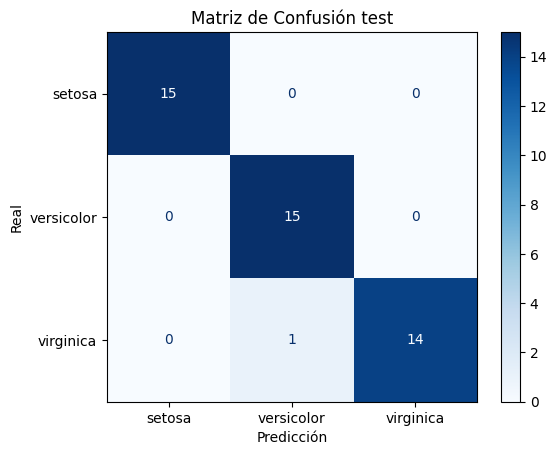

In [51]:
# 3. Hacer una analisis de las metricas, construir curvas de aprendizaje para todo el conjunto de datos
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(logistic, X_test, Y_test, cmap = 'Blues', display_labels = iris["target_names"])
plt.title("Matriz de Confusión test")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

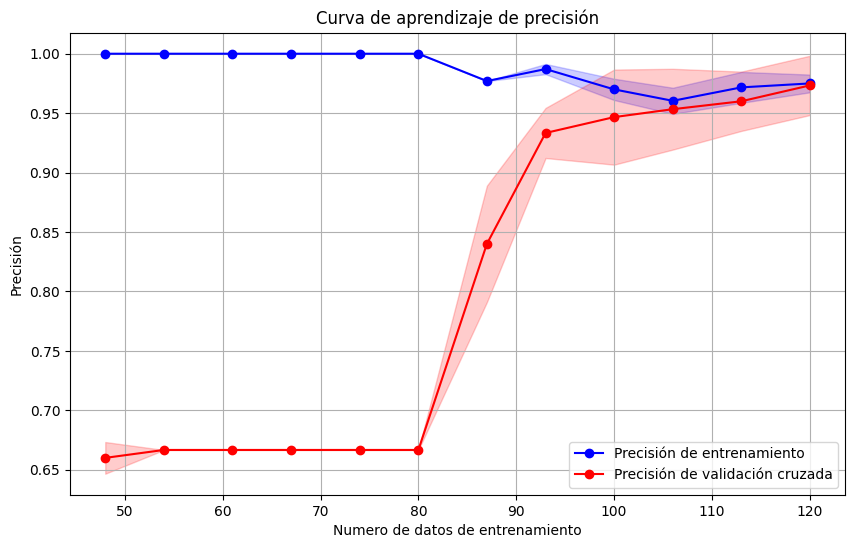

In [45]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold

particiones = StratifiedKFold(n_splits = 5) # Balanceamos las particiones en cross-validation

lista_learning_curve = learning_curve(logistic, data[features], data["target"], cv=particiones, train_sizes=np.linspace(0.4, 1.0, 12), scoring='accuracy') # cv es el numero de particiones o plieges del k-fold cross-validation (es la k en este algoritmo)
train_sizes = lista_learning_curve[0]
train_scores = lista_learning_curve[1]
val_scores = lista_learning_curve[2]

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color = "b", label = "Precisión de entrenamiento")
plt.plot(train_sizes, val_mean, 'o-', color = "r", label = "Precisión de validación cruzada")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="b", alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="r", alpha=0.2)

plt.title("Curva de aprendizaje de precisión")
plt.xlabel("Numero de datos de entrenamiento")
plt.ylabel("Precisión")
plt.legend(loc = "lower right")
plt.grid()
plt.show()

Graficamos las curvas de aprendizaje del modelo usando la precision. Notamos que luego de los 100 datos de entrenamiento el modelo logra capturar bien la generalidad del set de datos, estabilizando la precision del modelo para el set de prueba y entrenamiento. Esto se puede ver en la grafica de la curva de aprendizaje, además las curvas sugieren que el modelo no sufre de overfitting ni de underfitting.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=75e9ce73-2bd0-4d4d-851b-c8f87498fb7b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>